In [1]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_players_with_pos_fbref_ds.csv'

# Load the CSV file into a DataFrame
players_df = pd.read_csv(file_path)

import pandas as pd

# Assuming 'final_merged_df' is your DataFrame that includes the 'league' column
leagues_to_remove = ['JAP-J1 League', 'RUS-League', 'AUT-Football Bundesliga', 'TUR-League']

# Filter the DataFrame to keep only the rows where 'league' is not in the list of leagues to remove
new_players_df = players_df[~players_df['league'].isin(leagues_to_remove)]

# Filter the DataFrame to include only rows where 'RB' or 'RWB' appears in 'main_pos' or '2nd_pos'
CAM_team_stats_df = new_players_df[(new_players_df['main_pos'].isin(['AM', 'RM', 'LM', 'LW', 'RW'])) | 
                                            (new_players_df['2nd_pos'].isin(['AM', 'CM', 'RM', 'LM', 'LW', 'RW']))]

# Display the first few rows of the filtered DataFrame to verify
print(CAM_team_stats_df.head(10))


                league  season         team              player nation    pos  \
2   ENG-Premier League    2324      Arsenal         Bukayo Saka    ENG     FW   
7   ENG-Premier League    2324      Arsenal    Emile Smith Rowe    ENG     MF   
8   ENG-Premier League    2324      Arsenal       Ethan Nwaneri    ENG     FW   
9   ENG-Premier League    2324      Arsenal        Fabio Vieira    POR  MF,FW   
11  ENG-Premier League    2324      Arsenal  Gabriel Martinelli    BRA     FW   
15  ENG-Premier League    2324      Arsenal         Kai Havertz    GER  MF,FW   
16  ENG-Premier League    2324      Arsenal    Leandro Trossard    BEL  FW,MF   
17  ENG-Premier League    2324      Arsenal     Martin Ødegaard    NOR     MF   
20  ENG-Premier League    2324      Arsenal        Reiss Nelson    ENG     FW   
27  ENG-Premier League    2324  Aston Villa      Cameron Archer    ENG     MF   

       age    born   90s  Standard_Gls  ...  Corner Kicks_Str  Outcomes_Cmp  \
2   22-214  2001.0  26.0     

C:\Users\jbuck\AppData\Local\Temp\ipykernel_7940\3079628642.py:7: DtypeWarning: Columns (6,31,55,79,103,135,166) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv(file_path)


In [2]:
import pandas as pd

# Define the file path
file_path = r'C:\Users\jbuck\Player-Recommendation-System\Player Metrics\full_team_stats.csv'

# Load the CSV file into a DataFrame
team_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(team_stats_df.head())


               league  season         team  players_used_misc  90s_misc  \
0  ENG-Premier League    2324      Arsenal                 25        34   
1  ENG-Premier League    2324  Aston Villa                 30        34   
2  ENG-Premier League    2324  Bournemouth                 29        34   
3  ENG-Premier League    2324    Brentford                 28        34   
4  ENG-Premier League    2324     Brighton                 29        32   

   Performance_CrdY_misc  Performance_CrdR_misc  Performance_2CrdY_misc  \
0                     55                      2                       1   
1                     85                      2                       0   
2                     69                      3                       0   
3                     80                      2                       0   
4                     77                      3                       0   

   Performance_Fls_misc  Performance_Fld_misc  ...  \
0                   345                   35

In [3]:
import pandas as pd

# Assuming CB_df is your DataFrame for centerbacks and team_stats_df is your DataFrame for team stats
# Ensure both dataframes have the 'league' and 'team' columns formatted similarly

# Merge the DataFrames on both 'league' and 'team' columns
CAM_team_stats_df = pd.merge(CAM_team_stats_df, team_stats_df, on=['league', 'team'], suffixes=('', '_team'))

def filter_players_by_games_played(data, column, threshold):
    """ Filter out players who have played fewer games than the specified threshold. """
    filtered_df = data[data[column] >= threshold]
    return filtered_df

# Usage example, applying the filter
CAM_team_stats_df = filter_players_by_games_played(CAM_team_stats_df, '90s', 5)
print(CAM_team_stats_df)


                  league  season             team               player nation  \
0     ENG-Premier League    2324          Arsenal          Bukayo Saka    ENG   
4     ENG-Premier League    2324          Arsenal   Gabriel Martinelli    BRA   
5     ENG-Premier League    2324          Arsenal          Kai Havertz    GER   
6     ENG-Premier League    2324          Arsenal     Leandro Trossard    BEL   
7     ENG-Premier League    2324          Arsenal      Martin Ødegaard    NOR   
...                  ...     ...              ...                  ...    ...   
1688          ARG-League    2324  Vélez Sarsfield        Elías Cabrera    ARG   
1689          ARG-League    2324  Vélez Sarsfield  Gianluca Prestianni    ARG   
1690          ARG-League    2324  Vélez Sarsfield     Julián Fernández    ARG   
1692          ARG-League    2324  Vélez Sarsfield         Lucas Janson    ARG   
1694          ARG-League    2324  Vélez Sarsfield           Walter Bou    ARG   

        pos     age    born

In [4]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_team_stats_df = CAM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CAM_team_stats_df.head())


               league  season     team              player nation    pos  \
0  ENG-Premier League    2324  Arsenal         Bukayo Saka    ENG     FW   
4  ENG-Premier League    2324  Arsenal  Gabriel Martinelli    BRA     FW   
5  ENG-Premier League    2324  Arsenal         Kai Havertz    GER  MF,FW   
6  ENG-Premier League    2324  Arsenal    Leandro Trossard    BEL  FW,MF   
7  ENG-Premier League    2324  Arsenal     Martin Ødegaard    NOR     MF   

      age    born   90s  Standard_Gls  ...  Per 90 Minutes_G+A_allowed_stand  \
0  22-214  2001.0  26.0            13  ...                              1.48   
4  22-293  2001.0  19.8             6  ...                              1.48   
5  24-300  1999.0  21.5             8  ...                              1.48   
6  29-124  1994.0  12.5             7  ...                              1.48   
7  25-111  1998.0  26.5             7  ...                              1.48   

   Per 90 Minutes_G-PK_allowed_stand  Per 90 Minutes_G+A-PK_al

In [5]:
for column in CAM_team_stats_df.columns:
    print(column)

league
season
team
player
nation
pos
age
born
90s
Standard_Gls
Standard_Sh
Standard_SoT
Standard_SoT%
Standard_Sh/90
Standard_SoT/90
Standard_G/Sh
Standard_G/SoT
Standard_Dist
Standard_FK
Standard_PK
Standard_PKatt
Expected_xG
Expected_npxG
Expected_npxG/Sh
Expected_G-xG
Expected_np:G-xG
League
league.1
season.1
nation.1
pos.1
age.1
born.1
90s.1
SCA_SCA
SCA_SCA90
SCA Types_PassLive
SCA Types_PassDead
SCA Types_TO
SCA Types_Sh
SCA Types_Fld
SCA Types_Def
GCA_GCA
GCA_GCA90
GCA Types_PassLive
GCA Types_PassDead
GCA Types_TO
GCA Types_Sh
GCA Types_Fld
GCA Types_Def
League.1
league.2
season.2
nation.2
pos.2
age.2
born.2
90s.2
Tackles_Tkl
Tackles_TklW
Tackles_Def 3rd
Tackles_Mid 3rd
Tackles_Att 3rd
Challenges_Tkl
Challenges_Att
Challenges_Tkl%
Challenges_Lost
Blocks_Blocks
Blocks_Sh
Blocks_Pass
Int
Tkl+Int
Clr
Err
League.2
league.3
season.3
nation.3
pos.3
age.3
born.3
90s.3
Performance_CrdY
Performance_CrdR
Performance_2CrdY
Performance_Fls
Performance_Fld
Performance_Off
Performance_Crs
Per

In [6]:
import pandas as pd
import numpy as np

def calculate_wide_creator_stats(df):
    # Check and calculate each stat if columns exist
    if 'Pass Types_Crs' in df.columns and 'Touches_Touches' in df.columns:
        df['crosses_per_touch'] = (df['Pass Types_Crs'] / df['Touches_Touches']) * 100  # Convert to percentage
        
    if 'CrsPA' in df.columns and 'Total_Att' in df.columns:
        df['crosses_percent_of_teams_total_crosses'] = (df['Pass Types_Crs'] / df['Pass Types_Crs_pass_type']) * 100  # Convert to percentage
        
    if 'Expected_xA' in df.columns and 'Touches_Att 3rd' in df.columns:
        df['expected_assists_per_touch_final_third'] = (df['Expected_xA'] / df['Touches_Att 3rd']) * 100  # Convert to percentage
        
    if 'SCA_SCA' in df.columns and 'Touches_Att 3rd' in df.columns:
        df['sca_per_touch_final_third'] = (df['SCA_SCA'] / df['Touches_Att 3rd']) * 100  # Convert to percentage
        
    if 'KP' in df.columns and 'Total_Att' in df.columns:
        df['key_passes_per_total_passes'] = (df['KP'] / df['Total_Att']) * 100  # Convert to percentage
        
    return df

# Calculate wide creator stats
CAM_team_stats_df = calculate_wide_creator_stats(CAM_team_stats_df)
print(CAM_team_stats_df.head())

# Further processing could include log transformation, capping extreme values, calculating z-scores, and computing a final 'Wide Creator' score.


               league  season     team              player nation    pos  \
0  ENG-Premier League    2324  Arsenal         Bukayo Saka    ENG     FW   
4  ENG-Premier League    2324  Arsenal  Gabriel Martinelli    BRA     FW   
5  ENG-Premier League    2324  Arsenal         Kai Havertz    GER  MF,FW   
6  ENG-Premier League    2324  Arsenal    Leandro Trossard    BEL  FW,MF   
7  ENG-Premier League    2324  Arsenal     Martin Ødegaard    NOR     MF   

      age    born   90s  Standard_Gls  ...  \
0  22-214  2001.0  26.0            13  ...   
4  22-293  2001.0  19.8             6  ...   
5  24-300  1999.0  21.5             8  ...   
6  29-124  1994.0  12.5             7  ...   
7  25-111  1998.0  26.5             7  ...   

   Per 90 Minutes_xG+xAG_allowed_stand  Per 90 Minutes_npxG_allowed_stand  \
0                                 1.19                               0.63   
4                                 1.19                               0.63   
5                                 1

In [7]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_wide_creator(data, columns):
    """ Calculate Z-scores for log-transformed wide creator columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_wide_creator_score(data, columns, weights):
    """ Compute the weighted score for the 'Wide Creator' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['wide_creator_score'] = data[z_score_columns].dot(weights)
    min_score = data['wide_creator_score'].min()
    max_score = data['wide_creator_score'].max()
    data['wide_creator_score'] = ((data['wide_creator_score'] - min_score) / (max_score - min_score)) * 100
    return data

def prepare_final_df(original_df, score_df, score_column):
    """ Merge the calculated scores into the original DataFrame and ensure only relevant columns are included. """
    merged_df = original_df.merge(score_df[['player', 'team', score_column]], on=['player', 'team'], how='left')
    final_df = merged_df[['player', 'team', 'league', score_column]]  # Select only required columns
    return final_df

# Define columns and weights for wide creator stats
wide_creator_columns = [
    'crosses_per_touch', 'crosses_percent_of_teams_total_crosses',
    'expected_assists_per_touch_final_third', 'sca_per_touch_final_third',
    'key_passes_per_total_passes'
]
weights_wide_creator = np.array([0.10, .20, 0.25, 0.25, 0.20])

# Assuming CAM_team_stats_df is preloaded with your data
# Cap extreme values
CAM_team_stats_df = cap_extreme_values(CAM_team_stats_df, wide_creator_columns)

# Apply log transformation
CAM_team_stats_df = log_transform(CAM_team_stats_df, wide_creator_columns)

# Generate Z-scores and compute the final score
log_transformed_columns = [col + '_log' for col in wide_creator_columns]
scores_df_wide_creator = calculate_z_scores_wide_creator(CAM_team_stats_df, log_transformed_columns)
scores_df_wide_creator = compute_wide_creator_score(scores_df_wide_creator, log_transformed_columns, weights_wide_creator)

# Prepare the final DataFrame for output
CAM_scores_df = prepare_final_df(CAM_team_stats_df, scores_df_wide_creator, 'wide_creator_score')

# Display the DataFrame to check the results
print(CAM_scores_df.head())


               player     team              league  wide_creator_score
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384


In [8]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_scores_df = CAM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CAM_scores_df.head())


               player     team              league  wide_creator_score
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384


In [9]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_wcs = view_top_players(CAM_scores_df, 'wide_creator_score')
print(top_wcs)


               player            team            league  wide_creator_score
216    Xavier Mercier   RWD Molenbeek    BEL-Pro League          100.000000
167        Alex Baena      Villarreal       ESP-La Liga           99.312991
270        Remi Oudin           Lecce       ITA-Serie A           97.812644
547      Sorba Thomas    Huddersfield  ENG-Championship           97.630864
400     Téji Savanier     Montpellier       FRA-Ligue 1           97.551886
326  Jan-Niklas Beste      Heidenheim    GER-Bundesliga           96.924712
658       Vitor Bueno  Ath Paranaense        BRA-League           95.673230
315     Julian Brandt        Dortmund    GER-Bundesliga           95.497419
757  Yeferson Soteldo          Santos        BRA-League           94.823477
418         Junya Ito           Reims       FRA-Ligue 1           94.732921


In [10]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CAM_scores_df[['wide_creator_score']].describe()
print(descriptive_statistics)


       wide_creator_score
count          965.000000
mean            57.870021
std             18.070130
min              0.000000
25%             46.079248
50%             59.425599
75%             70.888142
max            100.000000


In [11]:
import pandas as pd

# Assume CAM_team_stats_df is your DataFrame with necessary columns loaded

required_columns = ['Touches_Att 3rd', 'Expected_xA', 'KP', 'SCA_SCA90', 'Touches_Att 3rd_poss', 'Pass Types_TB', 'Pass Types_TB_pass_type']
missing_columns = [col for col in required_columns if col not in CAM_team_stats_df.columns]

if missing_columns:
    print("Missing columns:", missing_columns)
else:
    # Calculate the percentage of player's through balls from the team's total through balls
    team_total_through_balls = CAM_team_stats_df['Pass Types_TB_pass_type'].sum()
    CAM_team_stats_df['through_balls_percent_of_teams_total_through_balls'] = (CAM_team_stats_df['Pass Types_TB'] / team_total_through_balls) * 100

    # Key passes per touch in the attacking third
    CAM_team_stats_df['key_passes_per_touch_att_3rd'] = (CAM_team_stats_df['KP'] / CAM_team_stats_df['Touches_Att 3rd']) * 100

    # Expected assists per touch in the attacking third
    CAM_team_stats_df['expected_assists_per_touch_att_3rd'] = (CAM_team_stats_df['Expected_xA'] / CAM_team_stats_df['Touches_Att 3rd']) * 100

    # Shot creating actions per touch in the attacking third
    CAM_team_stats_df['sca_per_team_sca_per_90'] = (CAM_team_stats_df['SCA_SCA90'] / CAM_team_stats_df['Touches_Att 3rd']) * 100

    # Total touches in attacking 3rd percent of total team touches in the attacking third
    team_total_touches_att_3rd = CAM_team_stats_df['Touches_Att 3rd_poss'].sum()
    CAM_team_stats_df['touches_att_3rd_percent_team'] = (CAM_team_stats_df['Touches_Att 3rd'] / team_total_touches_att_3rd) * 100

    print("Metrics calculated and added to DataFrame.")
    # Optionally, view the updated DataFrame to confirm new columns
    print(CAM_team_stats_df.head())


Metrics calculated and added to DataFrame.
               league  season     team              player nation    pos  \
0  ENG-Premier League    2324  Arsenal         Bukayo Saka    ENG     FW   
4  ENG-Premier League    2324  Arsenal  Gabriel Martinelli    BRA     FW   
5  ENG-Premier League    2324  Arsenal         Kai Havertz    GER  MF,FW   
6  ENG-Premier League    2324  Arsenal    Leandro Trossard    BEL  FW,MF   
7  ENG-Premier League    2324  Arsenal     Martin Ødegaard    NOR     MF   

      age    born   90s  Standard_Gls  ...  crosses_per_touch_log  \
0  22-214  2001.0  26.0            13  ...               2.416633   
4  22-293  2001.0  19.8             6  ...               2.226359   
5  24-300  1999.0  21.5             8  ...               0.247304   
6  29-124  1994.0  12.5             7  ...               2.214432   
7  25-111  1998.0  26.5             7  ...               1.286753   

   crosses_percent_of_teams_total_crosses_log  \
0                                   

In [12]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_central_creator(data, columns):
    """ Calculate Z-scores for log-transformed columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_central_creator_score(data, columns, weights):
    """ Compute the weighted score for the 'Central Creator' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    
    # Calculate weighted sum of Z-scores
    data['central_creator_score'] = data[z_score_columns].dot(weights)
    
    # Scale scores to 0-100
    min_score = data['central_creator_score'].min()
    max_score = data['central_creator_score'].max()
    data['central_creator_score'] = ((data['central_creator_score'] - min_score) / (max_score - min_score)) * 100
    
    return data

# Define columns and weights for the Central Creator role
central_creator_columns = [
    'through_balls_percent_of_teams_total_through_balls',
    'key_passes_per_touch_att_3rd',
    'expected_assists_per_touch_att_3rd',
    'sca_per_team_sca_per_90',
    'touches_att_3rd_percent_team'
]
weights_central_creator = np.array([0.30, 0.15, 0.10, 0.15, 0.30])  # Adjust weights as necessary

# Assuming CAM_team_stats_df is preloaded with your data
# Cap extreme values
CAM_team_stats_df = cap_extreme_values(CAM_team_stats_df, central_creator_columns)

# Apply log transformation
CAM_team_stats_df = log_transform(CAM_team_stats_df, central_creator_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in central_creator_columns]
scores_df_central_creator = calculate_z_scores_central_creator(CAM_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_central_creator = compute_central_creator_score(scores_df_central_creator, log_transformed_columns, weights_central_creator)

if 'player' not in scores_df_central_creator.columns or 'team' not in scores_df_central_creator.columns or 'league' not in scores_df_central_creator.columns:
    scores_df_central_creator.reset_index(inplace=True)  # Reset index if the DataFrame was previously indexed by these columns

# Merge the 'central_creator_score' into CAM_scores_df
CAM_scores_df = CAM_scores_df.merge(scores_df_central_creator[['player', 'team', 'league', 'central_creator_score']],
                                    on=['player', 'team', 'league'],
                                    how='left')  # Use 'left' to keep all entries from CAM_scores_df and fill missing scores with NaN

# Display the DataFrame to check the results
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  
0              85.274141  
1              73.065348  
2              65.690215  
3              70.244278  
4              96.509462  


In [13]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_scores_df = CAM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  
0              85.274141  
1              73.065348  
2              65.690215  
3              70.244278  
4              96.509462  


In [14]:
def view_top_players(df, score_column, num_players=10):
    """ Display the top players based on the given score column. """
    top_players = df.sort_values(by=score_column, ascending=False).head(num_players)
    return top_players

# Example usage to view the top 10 players for the 'Progressor' role
top_ccs = view_top_players(CAM_scores_df, 'central_creator_score')
print(top_ccs)


              player             team            league  wide_creator_score  \
658      Vitor Bueno   Ath Paranaense        BRA-League           95.673230   
400    Téji Savanier      Montpellier       FRA-Ligue 1           97.551886   
167       Alex Baena       Villarreal       ESP-La Liga           99.312991   
547     Sorba Thomas     Huddersfield  ENG-Championship           97.630864   
956    Rodrigo Garro         Talleres        ARG-League           94.666789   
780   Ángel Di María          Benfica        POR-League           84.764377   
344      Xavi Simons       RB Leipzig    GER-Bundesliga           88.239195   
218  Jarne Steuckers     Sint-Truiden    BEL-Pro League           81.507025   
592        Finn Azaz  Plymouth Argyle  ENG-Championship           85.729234   
753    Raphael Veiga        Palmeiras        BRA-League           93.602260   

     central_creator_score  
658             100.000000  
400              99.967290  
167              99.842417  
547           

In [15]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CAM_scores_df[['wide_creator_score', 'central_creator_score']].describe()
print(descriptive_statistics)


       wide_creator_score  central_creator_score
count          965.000000             965.000000
mean            57.870021              63.353512
std             18.070130              18.953799
min              0.000000               0.000000
25%             46.079248              51.961433
50%             59.425599              66.757528
75%             70.888142              77.380496
max            100.000000             100.000000


In [16]:
import pandas as pd

# Assuming CAM_stats_df is your DataFrame with the necessary columns loaded

def calculate_goal_threat_stats(df):
    # Calculate percent of touches in attacking penalty area relative to total team touches in the attacking penalty area
    if 'Touches_Att Pen' in df.columns and 'Touches_Att Pen_poss' in df.columns:
        team_total_touches_att_pen = df['Touches_Att Pen_poss'].sum()
        df['touches_in_att_pen_percent'] = (df['Touches_Att Pen'] / team_total_touches_att_pen) * 100

    # Calculate shots per 90 minutes
    if 'Standard_Sh' in df.columns and '90s' in df.columns:
        df['shots_per_90'] = df['Standard_Sh'] / df['90s']

    # Calculate goals per shot
    if 'Standard_Sh' in df.columns and 'Standard_G/Sh' in df.columns:
        df['goals_per_shot'] = df['Standard_G/Sh']  # Assuming G/Sh column is already the goals per shot ratio

    # Calculate non-penalty expected goals per 90 as a percentage of team total non-penalty expected goals per 90
    if 'Expected_npxG' in df.columns and '90s' in df.columns and 'Expected_npxG_stand' in df.columns and '90s_poss' in df.columns:
        player_npxg_per_90 = df['Expected_npxG'] / df['90s']
        team_npxg_per_90 = df['Expected_npxG_stand'] / df['90s_poss']
        df['npxg_per_90_percent'] = (player_npxg_per_90 / team_npxg_per_90) * 100

    # Calculate goal creating actions per 90 as a percentage of team total goal creating actions per 90
    if 'GCA_GCA90' in df.columns and 'GCA_GCA90_gsca' in df.columns:
        team_gca_per_90 = df['GCA_GCA90_gsca'].sum()
        df['gca_per_90_percent'] = (df['GCA_GCA90'] / team_gca_per_90) * 100

    return df

# Calculate goal threat stats for CAM_stats_df
CAM_team_stats_df = calculate_goal_threat_stats(CAM_team_stats_df)
print(CAM_team_stats_df.head())

# Further processing could include log transformation, capping extreme values, calculating z-scores, and computing a final 'Goal Threat' score.


               league  season     team              player nation    pos  \
0  ENG-Premier League    2324  Arsenal         Bukayo Saka    ENG     FW   
4  ENG-Premier League    2324  Arsenal  Gabriel Martinelli    BRA     FW   
5  ENG-Premier League    2324  Arsenal         Kai Havertz    GER  MF,FW   
6  ENG-Premier League    2324  Arsenal    Leandro Trossard    BEL  FW,MF   
7  ENG-Premier League    2324  Arsenal     Martin Ødegaard    NOR     MF   

      age    born   90s  Standard_Gls  ...  \
0  22-214  2001.0  26.0            13  ...   
4  22-293  2001.0  19.8             6  ...   
5  24-300  1999.0  21.5             8  ...   
6  29-124  1994.0  12.5             7  ...   
7  25-111  1998.0  26.5             7  ...   

   through_balls_percent_of_teams_total_through_balls_log  \
0                                          -4.917445        
4                                          -4.917445        
5                                          -6.013328        
6                     

In [17]:
import pandas as pd
import numpy as np

def log_transform(data, columns):
    """ Apply log transformation to specified columns, handling zero values. """
    for col in columns:
        offset = 1e-5  # Small offset to avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles to reduce the influence of outliers. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)  # Cap at the 99th percentile
        lower_limit = data[col].quantile(0.01)  # Cap at the 1st percentile
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def calculate_z_scores_goal_threat(data, columns):
    """ Calculate Z-scores for log-transformed columns in a DataFrame. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_goal_threat_score(data, columns, weights):
    """ Compute the weighted score for the 'Goal Threat' role, scaling the result to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['goal_threat_score'] = data[z_score_columns].dot(weights)
    min_score = data['goal_threat_score'].min()
    max_score = data['goal_threat_score'].max()
    data['goal_threat_score'] = ((data['goal_threat_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and weights for the Goal Threat role
goal_threat_columns = [
    'touches_in_att_pen_percent',
    'shots_per_90',
    'goals_per_shot',
    'npxg_per_90_percent',
    'gca_per_90_percent'
]
weights_goal_threat = np.array([0.2, 0.10, 0.2, 0.25, 0.25])  # Equal weighting for simplicity

# Assuming CAM_team_stats_df is preloaded with your data
# Cap extreme values
CAM_team_stats_df = cap_extreme_values(CAM_team_stats_df, goal_threat_columns)

# Apply log transformation
CAM_team_stats_df = log_transform(CAM_team_stats_df, goal_threat_columns)

# Generate Z-scores from the log-transformed data
log_transformed_columns = [col + '_log' for col in goal_threat_columns]
scores_df_goal_threat = calculate_z_scores_goal_threat(CAM_team_stats_df, log_transformed_columns)

# Compute the final score
scores_df_goal_threat = compute_goal_threat_score(scores_df_goal_threat, log_transformed_columns, weights_goal_threat)

# Reset index if necessary to prepare for merging
scores_df_goal_threat.reset_index(inplace=True)

# Merge the 'goal_threat_score' into CAM_scores_df
CAM_scores_df = CAM_scores_df.merge(scores_df_goal_threat[['player', 'team', 'league', 'goal_threat_score']],
                                    on=['player', 'team', 'league'],
                                    how='left')  # Use 'left' to keep all entries from CAM_scores_df and fill missing scores with NaN

# Display the DataFrame to check the results
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  goal_threat_score  
0              85.274141          93.126971  
1              73.065348          90.326209  
2              65.690215          89.153440  
3              70.244278          91.135067  
4              96.509462          79.062584  


In [18]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_scores_df = CAM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Print the updated DataFrame to verify changes
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  goal_threat_score  
0              85.274141          93.126971  
1              73.065348          90.326209  
2              65.690215          89.153440  
3              70.244278          91.135067  
4              96.509462          79.062584  


In [19]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_team_stats_df = CAM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])



In [20]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CAM_scores_df[['wide_creator_score', 'central_creator_score', 'goal_threat_score']].describe()
print(descriptive_statistics)


       wide_creator_score  central_creator_score  goal_threat_score
count          965.000000             965.000000         965.000000
mean            57.870021              63.353512          70.731496
std             18.070130              18.953799          16.776948
min              0.000000               0.000000           0.000000
25%             46.079248              51.961433          62.260473
50%             59.425599              66.757528          75.030466
75%             70.888142              77.380496          82.440920
max            100.000000             100.000000         100.000000


In [21]:
import pandas as pd
import numpy as np

# Assuming 'CAM_team_stats_df' is already defined and includes all the necessary columns

def calculate_dribbler_stats(df):
    # Calculate Carries per Touch
    df['carries_per_touch'] = df['Carries_Carries'] / df['Touches_Touches']

    # Calculate Take-Ons per Touch
    df['take_ons_per_touch'] = df['Take-Ons_Att'] / df['Touches_Touches']

    # Calculate Carries into Final Third and Penalty Area per 90
    df['carries_into_final_third_and_pa_per_90'] = (df['Carries_1/3'] + df['Carries_CPA']) / df['90s']
    team_total_carries_into_final_third_and_pa_per_90 = df['Carries_1/3_poss'] + df['Carries_CPA_poss'] / df['90s_poss']
    df['carries_into_final_third_and_pa_per_90_ratio'] = df['carries_into_final_third_and_pa_per_90'] / team_total_carries_into_final_third_and_pa_per_90

    # Calculate Progressive Carries per 90 compared to team total
    df['progressive_carries_per_90'] = df['Carries_PrgC'] / df['90s']
    team_progressive_carries_per_90 = df['Carries_PrgC_poss'] / df['90s_poss']
    df['progressive_carries_per_90_ratio'] = df['progressive_carries_per_90'] / team_progressive_carries_per_90

    # Calculate Dispossesses and Miscontrols per Carry
    df['dispossesses_and_miscontrols_per_carry'] = (df['Carries_Mis'] + df['Carries_Dis']) / df['Carries_Carries']

    return df

# Apply the function to compute the metrics
CAM_team_stats_df = calculate_dribbler_stats(CAM_team_stats_df)

# Display the DataFrame to check the results
print(CAM_team_stats_df[['player', 'carries_per_touch', 'take_ons_per_touch', 'carries_into_final_third_and_pa_per_90_ratio',
                         'progressive_carries_per_90_ratio', 'dispossesses_and_miscontrols_per_carry']].head())


               player  carries_per_touch  take_ons_per_touch  \
0         Bukayo Saka           0.642953            0.064430   
4  Gabriel Martinelli           0.696330            0.095413   
5         Kai Havertz           0.534342            0.032596   
6    Leandro Trossard           0.624776            0.048474   
7     Martin Ødegaard           0.675317            0.027761   

   carries_into_final_third_and_pa_per_90_ratio  \
0                                      0.009173   
4                                      0.013370   
5                                      0.004548   
6                                      0.004961   
7                                      0.007110   

   progressive_carries_per_90_ratio  dispossesses_and_miscontrols_per_carry  
0                          0.198128                                0.087683  
4                          0.244468                                0.098814  
5                          0.076423                                0.11546

In [22]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_dribbler(data, columns):
    """ Calculate Z-scores for the 'Dribbler' stats, inverting negative impact stats. """
    z_scores_df = data.copy()
    for col in columns:
        if 'dispossesses_and_miscontrols_per_carry' in col:
            # Invert the effect for negative impact stats
            z_scores_df[col + '_z'] = -(z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
        else:
            z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_dribbler_score(data, columns, weights):
    """ Compute the weighted 'Dribbler' score, scale to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['dribbler_score'] = data[z_score_columns].dot(weights)
    min_score = data['dribbler_score'].min()
    max_score = data['dribbler_score'].max()
    data['dribbler_score'] = ((data['dribbler_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and their weights
dribbler_columns = [
    'carries_per_touch',
    'take_ons_per_touch',
    'carries_into_final_third_and_pa_per_90_ratio',
    'progressive_carries_per_90_ratio',
    'dispossesses_and_miscontrols_per_carry'
]
weights_dribbler = np.array([0.15, 0.15, 0.30, 0.25, 0.15])  # Equal weighting for simplicity

# Assuming CAM_team_stats_df is preloaded with data
CAM_team_stats_df = cap_extreme_values(CAM_team_stats_df, dribbler_columns)
CAM_team_stats_df = log_transform(CAM_team_stats_df, dribbler_columns)
log_transformed_columns = [col + '_log' for col in dribbler_columns]
scores_df_dribbler = calculate_z_scores_dribbler(CAM_team_stats_df, log_transformed_columns)
scores_df_dribbler = compute_dribbler_score(scores_df_dribbler, log_transformed_columns, weights_dribbler)

# Merging the score into the existing CAM_scores_df
if 'player' not in CAM_scores_df.columns or 'team' not in CAM_scores_df.columns or 'league' not in CAM_scores_df.columns:
    CAM_scores_df.reset_index(inplace=True)

CAM_scores_df = CAM_scores_df.merge(scores_df_dribbler[['player', 'team', 'league', 'dribbler_score']],
                                  on=['player', 'team', 'league'], how='left')

# Print the updated DataFrame to check the results
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  goal_threat_score  dribbler_score  
0              85.274141          93.126971       72.026150  
1              73.065348          90.326209       83.956642  
2              65.690215          89.153440       37.775124  
3              70.244278          91.135067       48.953252  
4              96.509462          79.062584       59.325273  


In [23]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_scores_df = CAM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_team_stats_df = CAM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])




In [24]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CAM_scores_df[['wide_creator_score', 'central_creator_score', 'goal_threat_score', 'dribbler_score']].describe()
print(descriptive_statistics)


       wide_creator_score  central_creator_score  goal_threat_score  \
count          965.000000             965.000000         965.000000   
mean            57.870021              63.353512          70.731496   
std             18.070130              18.953799          16.776948   
min              0.000000               0.000000           0.000000   
25%             46.079248              51.961433          62.260473   
50%             59.425599              66.757528          75.030466   
75%             70.888142              77.380496          82.440920   
max            100.000000             100.000000         100.000000   

       dribbler_score  
count      965.000000  
mean        56.756447  
std         17.403336  
min          0.000000  
25%         46.318180  
50%         57.548788  
75%         69.424556  
max        100.000000  


In [25]:
import pandas as pd
import numpy as np

def calculate_defensive_stats(df):
    if '90s' in df.columns and '90s_poss' in df.columns:
        # Calculate per 90 stats
        if 'Tackles_TklW' in df.columns:
            df['tackles_won_per_90'] = df['Tackles_TklW'] / df['90s']
        if 'Performance_Recov' in df.columns:
            df['recoveries_per_90'] = df['Performance_Recov'] / df['90s']
        if 'Tkl+Int' in df.columns:
            df['tkl_and_int_per_90'] = df['Tkl+Int'] / df['90s']
        if 'Blocks_Blocks' in df.columns:
            df['blocks_per_90'] = df['Blocks_Blocks'] / df['90s']
        
        # Calculate team touches allowed per 90
        if 'Touches_Touches_allowed_poss' in df.columns:
            team_touches_allowed_per_90 = df['Touches_Touches_allowed_poss'] / df['90s_poss']

            # Scaling per 100 team touches allowed
            if 'tackles_won_per_90' in df.columns:
                df['tackles_won_per_90_per_100_team_touches'] = (df['tackles_won_per_90'] / team_touches_allowed_per_90) * 100
            if 'tkl_and_int_per_90' in df.columns:
                df['tkl_and_int_per_90_per_100_team_touches'] = (df['tkl_and_int_per_90'] / team_touches_allowed_per_90) * 100
            if 'blocks_per_90' in df.columns:
                df['blocks_per_90_per_100_team_touches'] = (df['blocks_per_90'] / team_touches_allowed_per_90) * 100

    return df

# Assuming CAM_team_stats_df is loaded with data
CAM_team_stats_df = calculate_defensive_stats(CAM_team_stats_df)

# Optionally, print the DataFrame to check the new stats
print(CAM_team_stats_df[['tackles_won_per_90_per_100_team_touches', 'recoveries_per_90', 'tkl_and_int_per_90_per_100_team_touches', 'blocks_per_90_per_100_team_touches']].head())


   tackles_won_per_90_per_100_team_touches  recoveries_per_90  \
0                                 0.198398           4.846154   
4                                 0.150302           4.090909   
5                                 0.101506           4.139535   
6                                 0.174590           4.160000   
7                                 0.089841           3.924528   

   tkl_and_int_per_90_per_100_team_touches  blocks_per_90_per_100_team_touches  
0                                 0.450211                            0.282336  
4                                 0.230462                            0.180362  
5                                 0.359885                            0.184556  
6                                 0.349181                            0.285693  
7                                 0.299469                            0.134761  


In [26]:
import pandas as pd
import numpy as np

def cap_extreme_values(data, columns):
    """ Cap extreme values for each column at the 99th and 1st percentiles. """
    for col in columns:
        upper_limit = data[col].quantile(0.99)
        lower_limit = data[col].quantile(0.01)
        data[col] = np.clip(data[col], lower_limit, upper_limit)
    return data

def log_transform(data, columns):
    """ Apply log transformation to specified columns. """
    for col in columns:
        offset = 1e-5  # To avoid log(0)
        data[col + '_log'] = np.log(data[col] + offset)
    return data

def calculate_z_scores_defensive(data, columns):
    """ Calculate Z-scores for the 'Defensive' stats. """
    z_scores_df = data.copy()
    for col in columns:
        z_scores_df[col + '_z'] = (z_scores_df[col] - z_scores_df[col].mean()) / z_scores_df[col].std()
    return z_scores_df

def compute_defensive_score(data, columns, weights):
    """ Compute the weighted 'Defensive' score, scale to 0-100. """
    z_score_columns = [col + '_z' for col in columns]
    data['defensive_score'] = data[z_score_columns].dot(weights)
    min_score = data['defensive_score'].min()
    max_score = data['defensive_score'].max()
    data['defensive_score'] = ((data['defensive_score'] - min_score) / (max_score - min_score)) * 100
    return data

# Define columns and their weights
defensive_columns = [
    'tackles_won_per_90_per_100_team_touches',
    'recoveries_per_90',
    'blocks_per_90_per_100_team_touches',
    'tkl_and_int_per_90_per_100_team_touches'
]
weights_defensive = np.array([0.25, 0.20, 0.20, 0.35])  # Equal weighting for simplicity

# Assuming CAM_team_stats_df is preloaded with data
CAM_team_stats_df = cap_extreme_values(CAM_team_stats_df, defensive_columns)
CAM_team_stats_df = log_transform(CAM_team_stats_df, defensive_columns)
log_transformed_columns = [col + '_log' for col in defensive_columns]
scores_df_defensive = calculate_z_scores_defensive(CAM_team_stats_df, log_transformed_columns)
scores_df_defensive = compute_defensive_score(scores_df_defensive, log_transformed_columns, weights_defensive)

# Merging the score into the existing CAM_scores_df
if 'player' not in CAM_scores_df.columns or 'team' not in CAM_scores_df.columns or 'league' not in CAM_scores_df.columns:
    CAM_scores_df.reset_index(inplace=True)

CAM_scores_df = CAM_scores_df.merge(scores_df_defensive[['player', 'team', 'league', 'defensive_score']],
                                    on=['player', 'team', 'league'], how='left')

# Print the updated DataFrame to check the results
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League           76.730856   
1  Gabriel Martinelli  Arsenal  ENG-Premier League           55.906368   
2         Kai Havertz  Arsenal  ENG-Premier League           45.174587   
3    Leandro Trossard  Arsenal  ENG-Premier League           58.662734   
4     Martin Ødegaard  Arsenal  ENG-Premier League           72.489384   

   central_creator_score  goal_threat_score  dribbler_score  defensive_score  
0              85.274141          93.126971       72.026150        77.653002  
1              73.065348          90.326209       83.956642        58.972771  
2              65.690215          89.153440       37.775124        62.805309  
3              70.244278          91.135067       48.953252        70.636884  
4              96.509462          79.062584       59.325273        55.593659  


In [27]:
# Display descriptive statistics for the three score columns
descriptive_statistics = CAM_scores_df[['wide_creator_score', 'central_creator_score', 'goal_threat_score', 'dribbler_score', 'defensive_score']].describe()
print(descriptive_statistics)


       wide_creator_score  central_creator_score  goal_threat_score  \
count          965.000000             965.000000         965.000000   
mean            57.870021              63.353512          70.731496   
std             18.070130              18.953799          16.776948   
min              0.000000               0.000000           0.000000   
25%             46.079248              51.961433          62.260473   
50%             59.425599              66.757528          75.030466   
75%             70.888142              77.380496          82.440920   
max            100.000000             100.000000         100.000000   

       dribbler_score  defensive_score  
count      965.000000       965.000000  
mean        56.756447        62.360605  
std         17.403336        16.478591  
min          0.000000         0.000000  
25%         46.318180        52.861127  
50%         57.548788        63.605291  
75%         69.424556        73.229951  
max        100.000000       100.

In [28]:
# Columns that contain scores
score_columns = ['wide_creator_score', 'central_creator_score', 'goal_threat_score', 'dribbler_score', 'defensive_score']

# Round each score column to two decimal places
for column in score_columns:
    if column in CAM_scores_df.columns:
        CAM_scores_df[column] = CAM_scores_df[column].round(2)

# Display the DataFrame to verify the changes
print(CAM_scores_df.head())


               player     team              league  wide_creator_score  \
0         Bukayo Saka  Arsenal  ENG-Premier League               76.73   
1  Gabriel Martinelli  Arsenal  ENG-Premier League               55.91   
2         Kai Havertz  Arsenal  ENG-Premier League               45.17   
3    Leandro Trossard  Arsenal  ENG-Premier League               58.66   
4     Martin Ødegaard  Arsenal  ENG-Premier League               72.49   

   central_creator_score  goal_threat_score  dribbler_score  defensive_score  
0                  85.27              93.13           72.03            77.65  
1                  73.07              90.33           83.96            58.97  
2                  65.69              89.15           37.78            62.81  
3                  70.24              91.14           48.95            70.64  
4                  96.51              79.06           59.33            55.59  


In [29]:
# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_scores_df = CAM_scores_df.drop_duplicates(subset=['team', 'player', 'league'])

# Drop duplicates based on 'team', 'player', and 'league' columns
CAM_team_stats_df = CAM_team_stats_df.drop_duplicates(subset=['team', 'player', 'league'])




C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jbuck\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

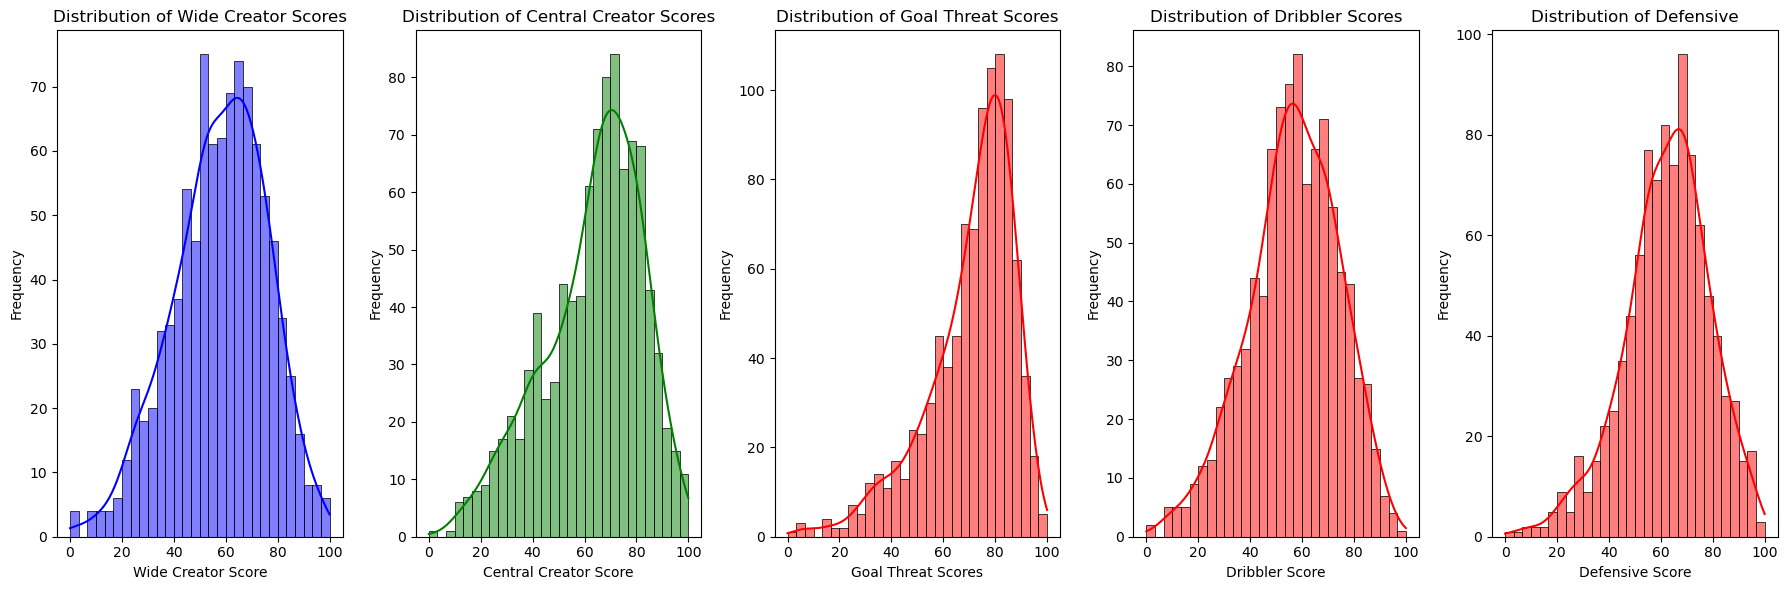

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming RB_scores_df already contains 'progression_score', 'defensive_score', and 'attacking_score'
# Plotting the distribution of scores

plt.figure(figsize=(18, 6))

# Progression Score
plt.subplot(1, 5, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(CAM_scores_df['wide_creator_score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Wide Creator Scores')
plt.xlabel('Wide Creator Score')
plt.ylabel('Frequency')

# Defensive Score
plt.subplot(1, 5, 2)  # 1 row, 3 columns, 2nd subplot
sns.histplot(CAM_scores_df['central_creator_score'], bins=30, kde=True, color='green')
plt.title('Distribution of Central Creator Scores')
plt.xlabel('Central Creator Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 5, 3)  # 1 row, 3 columns, 3rd subplot
sns.histplot(CAM_scores_df['goal_threat_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Goal Threat Scores')
plt.xlabel('Goal Threat Scores')
plt.ylabel('Frequency')


# Attacking Score
plt.subplot(1, 5, 4)  # 1 row, 3 columns, 3rd subplot
sns.histplot(CAM_scores_df['dribbler_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Dribbler Scores')
plt.xlabel('Dribbler Score')
plt.ylabel('Frequency')

# Attacking Score
plt.subplot(1, 5, 5)  # 1 row, 3 columns, 3rd subplot
sns.histplot(CAM_scores_df['defensive_score'], bins=30, kde=True, color='red')
plt.title('Distribution of Defensive')
plt.xlabel('Defensive Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [31]:
import pandas as pd
import numpy as np
import re

# Create a new column called 'age' in CB_scores
CAM_scores_df['age'] = None

# Loop through each row in CB_scores
for index, row in CAM_scores_df.iterrows():
    # Get the team and player name from the current row
    team = row['team']
    player = row['player']

    # Find the matching player in the players_df
    matching_player = players_df[(players_df['team'] == team) & (players_df['player'] == player)]

    # If a matching player is found, update the 'age' column in CB_scores
    if not matching_player.empty:
        CAM_scores_df.loc[index, 'age'] = matching_player['age'].values[0]

import pandas as pd
import re

# Assuming your DataFrame is named 'df'
CAM_scores_df['age'] = CAM_scores_df['age'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if pd.notnull(x) else x)

# Print the CB_scores DataFrame to verify
print(CAM_scores_df)

                  player             team              league  \
0            Bukayo Saka          Arsenal  ENG-Premier League   
1     Gabriel Martinelli          Arsenal  ENG-Premier League   
2            Kai Havertz          Arsenal  ENG-Premier League   
3       Leandro Trossard          Arsenal  ENG-Premier League   
4        Martin Ødegaard          Arsenal  ENG-Premier League   
..                   ...              ...                 ...   
965        Elías Cabrera  Vélez Sarsfield          ARG-League   
966  Gianluca Prestianni  Vélez Sarsfield          ARG-League   
967     Julián Fernández  Vélez Sarsfield          ARG-League   
968         Lucas Janson  Vélez Sarsfield          ARG-League   
969           Walter Bou  Vélez Sarsfield          ARG-League   

     wide_creator_score  central_creator_score  goal_threat_score  \
0                 76.73                  85.27              93.13   
1                 55.91                  73.07              90.33   
2           

In [32]:
import pandas as pd
import subprocess

# Assuming RB_scores_df is defined elsewhere in your notebook
CAM_scores_df.to_csv('Attacking Mid and Winger Role Scores.csv', index=False)

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Properly quote the filename to handle spaces
run_command('git add "Attacking Mid and Winger Role Scores.csv"')
run_command('git commit -m "Add or update Attacking Mid and Winger Role Scores.csv"')

# Make sure the branch 'main' exists by checking your GitHub repo or by running 'git branch' locally.
run_command('git push origin main')  # Adjust branch name if necessary


Output: 
Output: [main dd1080d] Add or update Attacking Mid and Winger Role Scores.csv
 1 file changed, 971 insertions(+)
 create mode 100644 Player Metrics/Attacking Midfielders and Wingers/Attacking Mid and Winger Role Scores.csv

Error: To https://github.com/Jbuck1016/Player-Recommendation-System.git
   a938dc5..dd1080d  main -> main



In [33]:
import subprocess

def run_command(command):
    result = subprocess.run(command, shell=True, text=True, capture_output=True)
    if result.stderr:
        print("Error:", result.stderr)
    else:
        print("Output:", result.stdout)

# Add, commit, pull, and then push
run_command('git add "creating CAM and Winger scores.ipynb"')
run_command('git commit -m "Update notebook with latest changes"')
run_command('git pull origin main')  # Pull before pushing to ensure the local repo is up-to-date
run_command('git push origin main')  # Adjust branch name if necessary


Error: warning: in the working copy of 'Player Metrics/Attacking Midfielders and Wingers/creating CAM and Winger scores.ipynb', LF will be replaced by CRLF the next time Git touches it

Output: [main 5b018d1] Update notebook with latest changes
 1 file changed, 2512 insertions(+)
 create mode 100644 Player Metrics/Attacking Midfielders and Wingers/creating CAM and Winger scores.ipynb

Error: From https://github.com/Jbuck1016/Player-Recommendation-System
 * branch            main       -> FETCH_HEAD

Error: To https://github.com/Jbuck1016/Player-Recommendation-System.git
   dd1080d..5b018d1  main -> main



In [32]:
CAM_scores_df.to_csv('Attacking Mid and Winger Role Scores.csv', index=False)